### I. The model: Hierarchical interactions

Measure the deviation from $X1$ that $X2$ contributes.

Bladder example: [Review interaction of TCR clonality with PD-L1 status](https://github.com/hammerlab/bladder-analyses/blob/reviewer-response/analyses/notebooks/2017-01-05%20review%20interaction%20TCR%20clonality%20by%20PD-L1%20status.ipynb)

### II. Stan code for the model

https://github.com/hammerlab/survivalstan/blob/master/survivalstan/stan/pem_survival_model_varying_coefs.stan

###  III. Simulate survival data

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import random
random.seed(1100038344)
import survivalstan
import numpy as np
import pandas as pd
from stancache import stancache
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext 

INFO:stancache.seed:Setting seed to 1245502385


autoreload


In [5]:
d = stancache.cached(
    survivalstan.sim.sim_data_exp_correlated,
    N=100,
    censor_time=20,
    rate_form='1 + sex',
    rate_coefs=[-3, 0.5],
)
d['age_centered'] = d['age'] - d['age'].mean()


INFO:stancache.stancache:sim_data_exp_correlated: cache_filename set to sim_data_exp_correlated.cached.N_100.censor_time_20.rate_coefs_21453428780.rate_form_1 + sex.pkl
INFO:stancache.stancache:sim_data_exp_correlated: Starting execution
INFO:stancache.stancache:sim_data_exp_correlated: Execution completed (0:00:00.092989 elapsed)
INFO:stancache.stancache:sim_data_exp_correlated: Saving results to cache


### IV. Explore simulated data

In [7]:
d.head()

,age,sex,rate,true_t,t,event,index,age_centered
0,52,male,0.082085,3.040497,3.040497,True,0,-3.78
1,54,male,0.082085,6.048914,6.048914,True,1,-1.78
2,61,male,0.082085,3.549959,3.549959,True,2,5.22
3,60,male,0.082085,6.663483,6.663483,True,3,4.22
4,54,male,0.082085,2.385216,2.385216,True,4,-1.78


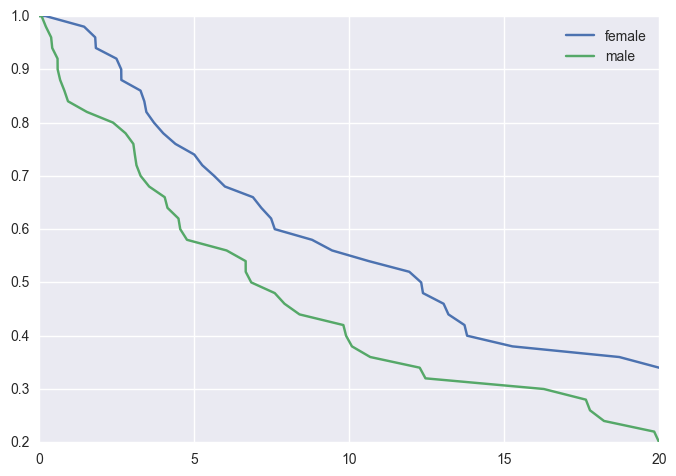

In [8]:
survivalstan.utils.plot_observed_survival(df=d[d['sex']=='female'], event_col='event', time_col='t', label='female')
survivalstan.utils.plot_observed_survival(df=d[d['sex']=='male'], event_col='event', time_col='t', label='male')
plt.legend()

### V. Transform to long or per-timepoint form

In [9]:
dlong = stancache.cached(
    survivalstan.prep_data_long_surv,
    df=d, event_col='event', time_col='t'
)

INFO:stancache.stancache:prep_data_long_surv: cache_filename set to prep_data_long_surv.cached.df_61796442086.event_col_event.time_col_t.pkl
INFO:stancache.stancache:prep_data_long_surv: Starting execution
INFO:stancache.stancache:prep_data_long_surv: Execution completed (0:00:00.474755 elapsed)
INFO:stancache.stancache:prep_data_long_surv: Saving results to cache


In [10]:
dlong.query('index == 1').sort_values('end_time').head()

,age,sex,rate,true_t,t,event,index,age_centered,key,end_time,end_failure
88,54,male,0.082085,6.048914,6.048914,True,1,-1.78,1,0.079408,False
93,54,male,0.082085,6.048914,6.048914,True,1,-1.78,1,0.206476,False
86,54,male,0.082085,6.048914,6.048914,True,1,-1.78,1,0.219319,False
147,54,male,0.082085,6.048914,6.048914,True,1,-1.78,1,0.388420,False
107,54,male,0.082085,6.048914,6.048914,True,1,-1.78,1,0.423732,False


### VI. Fit stan model

In [ ]:
testfit = survivalstan.fit_stan_survival_model(
    model_cohort = 'test model',
    model_code = survivalstan.models.pem_survival_model_varying_coefs,
    
    df = dlong,
    sample_col = 'index',
    timepoint_end_col = 'end_time',
    event_col = 'end_failure',
    iter = 5000,
    chains = 4,
    seed = 9001,
    formula = '~ age_centered',
    group_col = 'sex',
    FIT_FUN = stancache.cached_stan_fit,
    )

INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to anon_model.cython_0_25_2.model_code_16981651761948111690.pystan_2_14_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Loading result from cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to anon_model.cython_0_25_2.model_code_16981651761948111690.pystan_2_14_0_0.stanfit.chains_4.data_33949485488.iter_5000.seed_9001.pkl
INFO:stancache.stancache:sampling: Starting execution




### VII. Superficial review of convergence 

### 8. Plot posterior estimates of parameters

### 9. Posterior predictive checking